# Przetwarzanie i analiza danych w języku Python

### Wykorzystanie metod uczenia maszynowego i uczenia głębokiego do problemu klasyfikacji obiektów

### Wprowadzenie
Uczenie nadzorowane jest rodzajem uczenia maszynowego i wykorzystuje się je kiedy znany jest zbiór cech opisujących zmienną objaśnianą jak i znana jest sama zmienna objaśniana. Celem projektu jest wykorzystanie wybranych metod uczenia maszynowego do problemu klasyfikacji obiektów. Istnieje szereg metod umożliwiających zarówno predykcję zmiennych numerycznych jak i jakościowych. Natomiast niniejsza praca skupiać się będzie na klasyfikacji i predykcji zmiennej jakościowej. Pierwszym etapem badania będzie analiza eksploracyjna. Następnie zostaną stworzone modele klasyfikacyjne, a ich jakość zostanie oceniona i porównana z wykorzystaniem zbioru testowego. Badanie zostanie uzupełnione o analizę interpretowalności.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

### Omówienie zbioru danych

Zbiór danych składa się z siedmiu zmiennych:

1. species - gatunek
2. island - wyspa zamieszkiwania
3. bill_length_mm - długość dzioba [mm]
4. bill_depth_mm - wysokość/głębokość dzioba [mm]
5. flipper_length_mm - długość płetwy [mm]
6. body_mass_g - masa ciała [g]
7. sex - płeć 

Źródło danych: 
Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0.
https://allisonhorst.github.io/palmerpenguins/ [dostęp: 18.05.2022]

<img src="culmen_depth.png" alt="image" style="width: 500px;"/>
Źródło: https://allisonhorst.github.io/palmerpenguins/

Pierwsze pięć obserwacji zaprezentowano poniżej. Ponadto pokazano jakiego typu są poszczególne zmienne oraz czy zwierają braki w danych. 

In [34]:
dataset = pd.read_csv('penguins.csv')
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    int64  
 5   body_mass_g        342 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.8+ KB


Poniżej znajdują się obiekty z brakami danych. Wartości brakujące występują tylko dla zmiennej <i>sex</i>. 

In [36]:
dataset[dataset.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193,3475,NaN
8,Adelie,Torgersen,42.0,20.2,190,4250,NaN
9,Adelie,Torgersen,37.8,17.1,186,3300,NaN
10,Adelie,Torgersen,37.8,17.3,180,3700,NaN
46,Adelie,Dream,37.5,18.9,179,2975,NaN
177,Gentoo,Biscoe,44.5,14.3,216,4100,NaN
217,Gentoo,Biscoe,46.2,14.4,214,4650,NaN
255,Gentoo,Biscoe,47.3,13.8,216,4725,NaN
267,Gentoo,Biscoe,44.5,15.7,217,4875,NaN


In [37]:
dataset['species'] = dataset['species'].astype('category')
dataset['island'] = dataset['island'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    int64   
 5   body_mass_g        342 non-null    int64   
 6   sex                333 non-null    object  
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 14.4+ KB


### Uzupełnienie braków danych

Do uzupełnienia braków danych wykorzystano regresję logistyczną, gdzie zmienną prognozowaną była płeć (<i>sex</i>).

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [39]:
dataset['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

In [40]:
dataset_LR = dataset.dropna()
dataset_LR = pd.get_dummies(dataset_LR, columns=['species', 'island'], drop_first=True)
x_LR_train = dataset_LR.drop(['sex'],axis=1)
y_LR_train = dataset_LR['sex']

In [41]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(x_LR_train, y_LR_train)

LogisticRegression()

In [42]:
LR_for_prediction = dataset[dataset.isna().any(axis=1)]
LR_for_prediction = pd.get_dummies(LR_for_prediction, columns=['species', 'island'], drop_first=True)

In [43]:
LR_prediction_sex = pd.DataFrame(LR.predict(LR_for_prediction.drop(['sex'],axis=1)), 
                                 index=LR_for_prediction.index, columns=['sex'])

In [44]:
df_missing = dataset[dataset.isna().any(axis=1)].drop(['sex'],axis=1)
df_missing['sex'] = LR_prediction_sex['sex']

Dla obserwacji, w których brakowało dannych wykonano prognozę zmiennej <i>sex</i>:

In [45]:
df_missing

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193,3475,female
8,Adelie,Torgersen,42.0,20.2,190,4250,male
9,Adelie,Torgersen,37.8,17.1,186,3300,female
10,Adelie,Torgersen,37.8,17.3,180,3700,male
46,Adelie,Dream,37.5,18.9,179,2975,female
177,Gentoo,Biscoe,44.5,14.3,216,4100,female
217,Gentoo,Biscoe,46.2,14.4,214,4650,female
255,Gentoo,Biscoe,47.3,13.8,216,4725,female
267,Gentoo,Biscoe,44.5,15.7,217,4875,female


In [46]:
dataset = pd.concat([dataset.dropna(), df_missing], axis=0)
dataset['sex'] = dataset['sex'].astype('category')

Poniżej zaprezentowano zbiór po rozwiązaniu problemu z brakami danych. 

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 267
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    int64   
 5   body_mass_g        342 non-null    int64   
 6   sex                342 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 14.7 KB


### Obserwacje odstające
Do sprawdzenia występowania obserwacji odstających wykorzystano regułę trzech sigm. Obserwacja jest outlierem wtw. gdy po normalizacji którakolwiek z wartości zmiennych jest na moduł większa od trzech.

In [48]:
from sklearn import preprocessing

In [49]:
df_outliers = dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler_outliers = preprocessing.StandardScaler().fit(df_outliers)

In [50]:
df_outliers_scaled = pd.DataFrame(scaler_outliers.transform(df_outliers))

In [51]:
df_outliers_scaled.max()

0    2.875868
1    2.205397
2    2.142618
3    2.620248
dtype: float64

In [52]:
df_outliers_scaled.min()

0   -2.168526
1   -2.054446
2   -2.059320
3   -1.875362
dtype: float64

Wniosek: Brak obserwacji odstających, ponieważ po normalizacji brak jest wartości na moduł większych od 3. 

### Analiza eksploracyjna

Średnie wartości wszystkich zmiennych numerycznych są bliskie odpowiadającym im wartościom mediany co może wskazywać na symetryczność cech. Odchylenia standardowe są stosunkowo niewielkie, za wyjątkiem zmiennej body_mass, dla której odchylenie to jest równe ponad 800 g przy średniej w okolicach 4200 g. Jest to również zmienna z największą wartością skośności, która jest prawostronna - większość obserwacji jest poniżej średniej, czyli większość pingwinów waży mniej niż 4201 g. Wszystkie zmienne charakteryzuje ujemna kurtoza w przedziale między -0.74 a -1.00, co wskazuje, iż wartości poszczególnych zmiennych nie są skoncentrowane blisko średniej z danej cechy.

In [53]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [54]:
dataset.columns = ['species', 'island', 'bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'sex']

Poniżej zaprezentowano wykresy zależności pomiędzy zmiennymi numerycznymi z wyróżnieniem podziału na gatunki pingwinów. Wartość zmiennej bill_length jest podobna dla gatunku Chinstrap i Gentoo, jednocześnie będąc o kilkanaście jednostek większa niż w przypadku gatunku Adelie. Natomiast trzy pozostałe cechy (bill_depth, flipper_length, body_mass) przyjmują wartości bliskie sobie dla gatunku Adelie i Chinstrap. Pingwiny Gentoo zauważalnie odróżniają się od pozostałych dla tle właśnie tych zmiennych. Reprezentanci klasy Gentoo cechują się większą długością płetwy i masą ciała, ale mniejszą głębokością dzioba w stosunku do gatunku Adelie i Chinstrap.

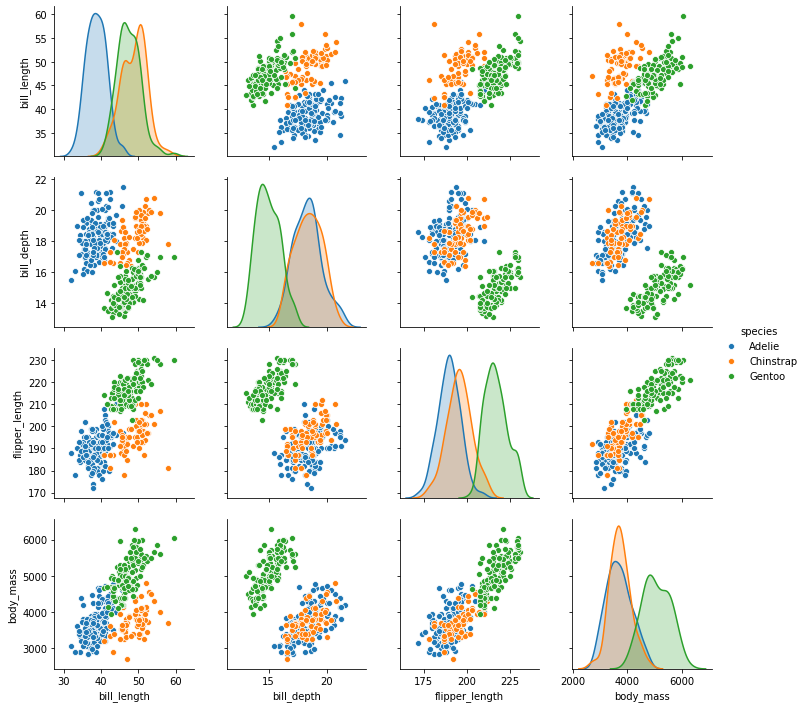

In [55]:
sns.pairplot(dataset, hue='species')

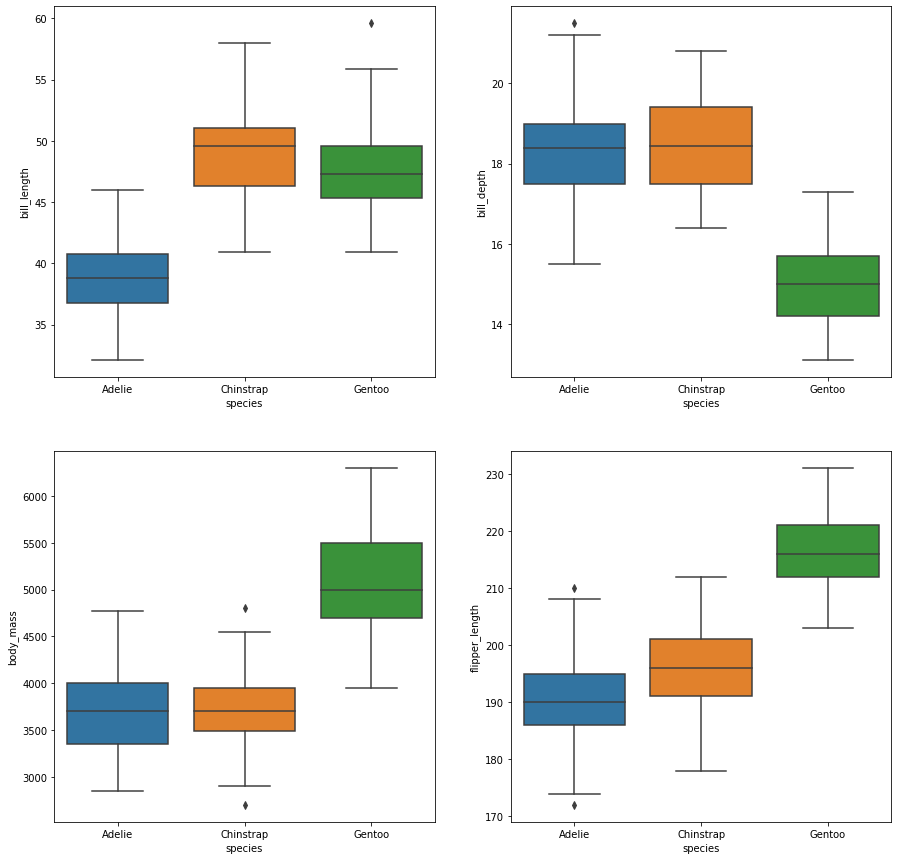

In [56]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
sns.boxplot(x='species',y='bill_length',data=dataset, ax=axs[0,0])
sns.boxplot(x='species',y='bill_depth',data=dataset, ax=axs[0,1])
sns.boxplot(x='species',y='flipper_length',data=dataset, ax=axs[1,1])
sns.boxplot(x='species',y='body_mass',data=dataset, ax=axs[1,0])

### Zbiór uczący i testowy

Przed podziałem zbioru na zbiór uczący i testowy dokonano transformacji zmiennych jakościowych na zmienne binarne. Zbiór podzielono w proporcji 4:1. 

In [57]:
dummies = pd.get_dummies(dataset[['island', 'sex']], drop_first=True)
dataset = pd.concat([dataset.drop(['island', 'sex'],axis=1),dummies],axis=1)
dataset.head()

,species,bill_length,bill_depth,flipper_length,body_mass,island_Dream,island_Torgersen,sex_male
0,Adelie,39.1,18.7,181,3750,0,1,1
1,Adelie,39.5,17.4,186,3800,0,1,0
2,Adelie,40.3,18.0,195,3250,0,1,0
3,Adelie,36.7,19.3,193,3450,0,1,0
4,Adelie,39.3,20.6,190,3650,0,1,1


In [58]:
X = dataset.drop('species',axis=1).values
y = dataset['species']
y = dataset.species.cat.codes

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Normalizacja z wykorzystaniem MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [63]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(273, 7)

### Sieć neuronowa

Zbudowana sieć neuronowa charakteryzuje się:
+ dwiema warstwami ukrytymi
+ siedmioma neuronami w każdej warstwie (za wyjątekim warstwy wyjściowej)
+ optimizer: ADAM
+ liczba epok: 75

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [33]:
y_cat_train = to_categorical(y_train,3)
y_cat_test = to_categorical(y_test,3)

In [34]:
seed_value = 1
model = Sequential()
model.add(Dense(7,  activation='relu'))
model.add(Dense(7,  activation='relu'))
model.add(Dense(7,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(x=X_train, 
          y=y_cat_train, 
          epochs=75,
          batch_size=16,
          validation_data=(X_test, y_cat_test), 
          )

Train on 273 samples, validate on 69 samples
Epoch 1/75
273/273 [==============================] - 1s 3ms/sample - loss: 1.0484 - accuracy: 0.4249 - val_loss: 1.0117 - val_accuracy: 0.5072
Epoch 2/75
273/273 [==============================] - 0s 172us/sample - loss: 1.0303 - accuracy: 0.4249 - val_loss: 0.9869 - val_accuracy: 0.5072
Epoch 3/75
273/273 [==============================] - 0s 171us/sample - loss: 1.0120 - accuracy: 0.4249 - val_loss: 0.9633 - val_accuracy: 0.5072
Epoch 4/75
273/273 [==============================] - 0s 172us/sample - loss: 0.9960 - accuracy: 0.4249 - val_loss: 0.9405 - val_accuracy: 0.5072
Epoch 5/75
273/273 [==============================] - 0s 195us/sample - loss: 0.9798 - accuracy: 0.4249 - val_loss: 0.9197 - val_accuracy: 0.5072
Epoch 6/75
273/273 [==============================] - 0s 185us/sample - loss: 0.9635 - accuracy: 0.4249 - val_loss: 0.8936 - val_accuracy: 0.5072
Epoch 7/75
273/273 [==============================] - 0s 185us/sample - loss: 0.9

In [36]:
predictions = model.predict_classes(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



Macierz pomyłek:

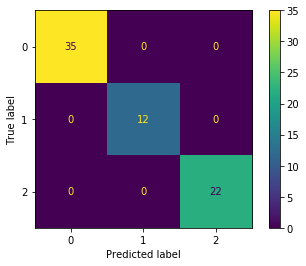

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot()

Zmianny dokładności modelu wraz z każdą kolejną epoką:

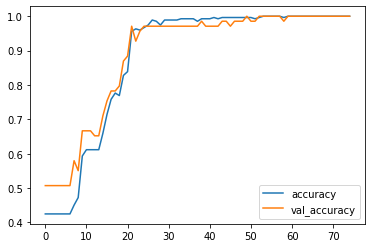

In [40]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy', 'val_accuracy']].plot()

### Metoda k-najbliższych sąsiadów

In [70]:
X = dataset.drop('species',axis=1)
y = dataset['species']
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Problemem przy wykorzystaniu metody k-najbliższych sąsiadów jest odpowiedni dobór parametru k, tak aby zdolności prognostyczne modelu były jak najlepsze. Z tego powodu wykorzystuje się funkcje umożliwiające znalezienie najlepszej wartości parametru k. W pracy zdecydowano się zbadać zachowanie modelu dla k = 1, 2, 3, ..., 24. Z badań wynika, iż najlepszym parametrem k jest k = 5, dlatego zdecydowano się, aby finalny model został stworzony właśnie w taką wartością parametru.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
pipe = Pipeline([('scaler',scaler),('knn',knn)])
k_values = list(range(1,25))
param_grid = {'knn__n_neighbors': k_values}
knn_classifier = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')
knn_classifier.fit(X_train,y_train)
knn_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [72]:
print(classification_report(y_test, knn_classifier.predict(X_test)))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        35
   Chinstrap       1.00      0.92      0.96        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



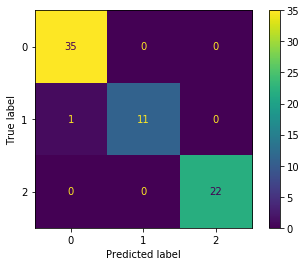

In [73]:
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_classifier.predict(X_test))).plot()

### Drzewa decyzyjne

W drzewach decyzyjnych dwoma najczęściej wykorzystywanymi kryteriami podziału są:
+ zysk informacyjny (oparte na wyznaczaniu entropii),
+ indeks Ginniego.

W pracy zostaną wyznaczone dwa modele drzew decyzyjnych w oparciu o oba kryteria podziału drzewa.

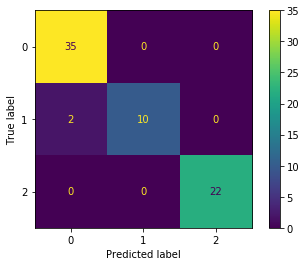

In [74]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
tree_pred = model_tree.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, tree_pred)).plot()

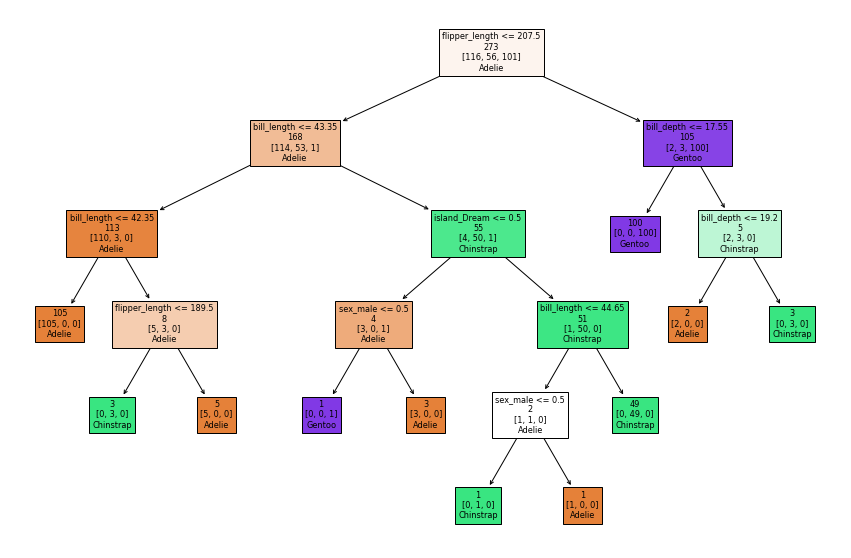

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model_tree, feature_names=X_test.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], label=None,
         filled=True, impurity=False);

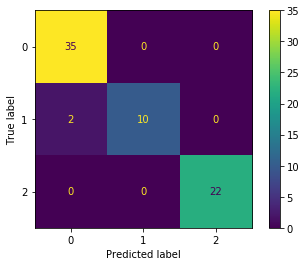

In [76]:
model_tree_entropy = DecisionTreeClassifier(criterion='entropy')
model_tree_entropy.fit(X_train, y_train)
tree_entropy_pred = model_tree_entropy.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, tree_entropy_pred)).plot()

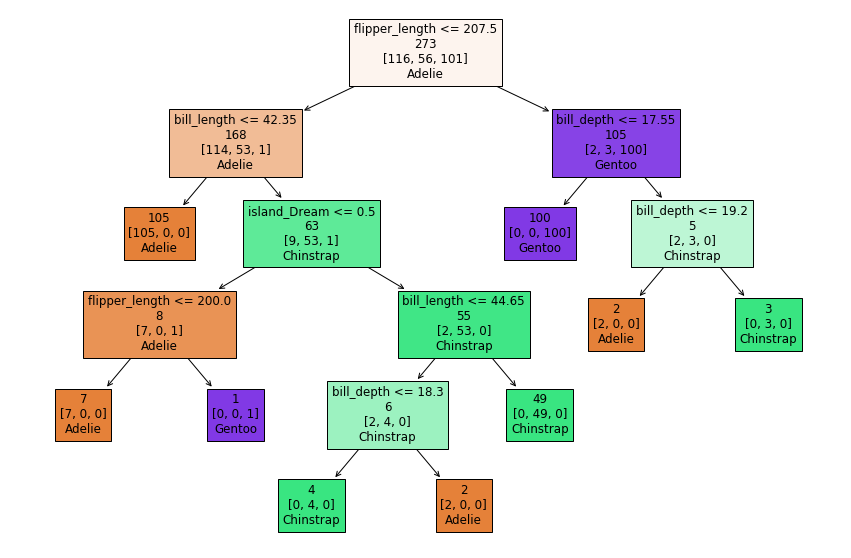

In [77]:
plt.figure(figsize=(15,10))
plot_tree(model_tree_entropy, feature_names=X_test.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], label=None,
         filled=True, impurity=False);

### Support Vector Machines

Podczas budowy modelu zdecydowano się na optymalizację hiperparametrów:
+ parametr C (wsp. regularyzacji): zbiór wartości {0.01,0.02,0.05,0.1,0.2,0.5,1};
+ jądro: linear, rbf, sigmoid.

In [78]:
from sklearn.svm import SVC
model_svm = SVC(gamma='auto')
model_svm.fit(X_train, y_train)
param_grid_svm = {'C':[0.01,0.02,0.05,0.1,0.2,0.5,1], 'kernel':['linear','rbf', 'sigmoid']}
grid_svm = GridSearchCV(model_svm, param_grid_svm, cv=10, scoring='accuracy')

Najlepszą dokładność cechował model o poniższych parametrach i to właśnie je zdecydowano się wykorzystać do budowy finalnego modelu SVM. 

In [79]:
grid_svm.fit(X_test, y_test)
grid_svm.best_params_

{'C': 0.05, 'kernel': 'linear'}

In [80]:
model_svm = SVC(kernel='linear', C=0.05 ,gamma='auto')
model_svm.fit(X_test, y_test)

SVC(C=0.05, gamma='auto', kernel='linear')

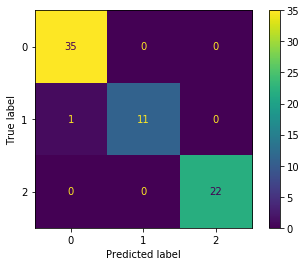

In [81]:
svm_pred = model_svm.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, svm_pred)).plot()

### Wartości SHAP

Wartości SHAP dla danej obserwacji umożliwiają ustalenie, która ze zmiennych objaśniających miała największy wpływ na predykcję i czy wpływ był dodani czy ujemny.

Wartości SHAP zostaną policzone dla metody k-najbliższych sąsiadów.

In [82]:
import dalex as dx

In [83]:
knn_example = KNeighborsClassifier(n_neighbors=5)
knn_example.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
example1 = pd.DataFrame(dataset.iloc[60,1:]).transpose()

In [88]:
explainer_knn = dx.Explainer(knn_example, X_train, y_train, label = "KNN", model_type='Classification')

Preparation of a new explainer is initiated

  -> data              : 273 rows 7 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 273 values
  -> target variable   : Please note that 'y' is a string array.
  -> target variable   : 'y' should be a numeric or boolean array.
  -> target variable   : Otherwise an Error may occur in calculating residuals or loss.
  -> model_class       : sklearn.neighbors._classification.KNeighborsClassifier (default)
  -> label             : KNN
  -> predict function  : <function yhat_proba_default at 0x00000230FD16CE58> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.182, max = 1.0
  -> model type        : Classification will be used
  -> residual function : difference between y and yhat (default)
  -> residuals         :  'residual_function' returns an Error when executed:
unsupported operand type

In [90]:
bd_example1 = explainer_knn.predict_parts(example1, type = 'shap')
# bd_example1.plot()

<img src="shap.png" alt="image" style="width: 500px;"/>

Wykres wskazuje, że najważniejszymi zmiennymi z punktu widzenia predykcji dla wybranego obiektu są zmienne <i>body_mass</i>, <i>bill_length</i> oraz <i>flipper_length</i>. Natomiast najmniej istotna była wyspa zamieszkania i płeć. 

### Podsumowanie

W projekcie wykorzystano wybrane metody uczenia maszynowego i uczenia głębokiego do rozwiązania problemu klasyfikacji obiektów. Była to metoda k-najbliższych sąsiadów, SVM, drzewo decyzyjne oraz regresja logistyczna. Wykorzystano również sieć neuronową. Aby poprawić jakość zbudowanych modeli, służących do predykcji zmiennej species zdecydowano się wykorzystać 10-krotny sprawdzian krzyżowy. Ponadto dokonano optymalizacji hiperparametrów.

Predykcja zmiennej species przebiegła bardzo dobrze, tzn. udało się otrzymać prawie bezbłędne w predykcji modele uczenia maszynowego i uczenia głębokiego. Wyniki prezentują się następująco:
+ sieć neuronowa - 100% dokładność, 
+ SVM oraz KNN - jedna obserwacja błędnie zaklasyfikowana - dokładność prawie 99%,
+ drzewa decyzyjne - dwie obserwacje błędnie zaklasyfikowane - dokładność ponad 97%. 

Pokazuje to, iż uczenie głębokie potrafi być skuteczniejsze, natomiast wykorzystuje się je raczej przy ogromnych zbiorach danych.

Problem klasyfikacji obiektów może być rozwiązywany na wiele sposobów. Warto nie ograniczać się do jednej lub dwóch metod, gdyż wyniki mogą nie być tak zadowolające jak w niniejszej pracy. Większe spektrum algorytmów może pozwolić na o wiele dokładniejszą predykcję. Istotną kwestią jest optymalizacja hiperparametrów algorytmów, gdyż pozwala to poprawić jakość predykcji.